## Complete text preprocessing


### General Feature Extraction
- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts


### Preprocessing and Cleaning
- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of RT
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt Sentiment Classifier

In [690]:
import pandas as pd
import numpy as np
import spacy

In [691]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [692]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding = 'latin1')

In [693]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [694]:
df['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64



### Word counts

In [695]:
len('this is text'.split())

3

In [696]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [697]:
df.sample(5)

,twitts,sentiment,word_counts
2415,O.o @Croconaw woah why didnt i try that... oka...,1,11
3897,A few feet away from our liv. rm window is a b...,1,25
2148,got invited to a pool party starts at 1 PM,1,10
820,@nikki_morris aww that is sad. I plan on bei...,0,18
3379,@patrick4men2s paddy! welcome to twitter! tha...,1,11


In [698]:
df['word_counts'].max()

32

In [699]:
df['word_counts'].min()

1

In [700]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1



### Characters count

In [701]:
len('this is')

7

In [702]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [703]:
char_counts('this is')

6

In [704]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [705]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
3992,Conan on The Tonight Show was good,1,7,28
531,Oh people. Thinking about the lack of sleep I'...,0,27,107
1756,Aww man its gone soo sad but it was too good ...,0,24,87
367,@karenplusone I just realized that WL are play...,0,24,110
1115,ok. off to bed. big day of immigration tomorrow.,0,9,40



### Average word length

In [706]:
x = 'this is' # 6/2 = 3
y = 'thankyou guys' # 12/2 = 6

In [707]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [708]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len
2594,@gab_iii We're awesome! I'm trying to get bot...,1,25,104,4.160000
3323,my hair is a potato,1,5,15,3.000000
3150,Morning I'm all disorientated. Lol,1,5,30,6.000000
3352,@swadley okay you caught me! The first time in...,1,21,87,4.142857



### Stop words count

In [709]:
print(stopwords)

{'say', 'none', 'next', 'own', 'that', 'done', 'per', 'against', 'beforehand', 'each', 'then', 'everywhere', 'above', 'during', 'herself', 'would', 'myself', 'under', '‘ll', 'hereafter', 'yours', 'wherein', 'made', 'please', 'else', 'from', 'off', 'although', 'my', 'herein', 'around', 'or', 'nor', 'neither', 'does', 'meanwhile', 'n’t', 'bottom', "n't", 'namely', 'wherever', 'the', 'both', 'twenty', 'amount', 'only', 'nowhere', 'nothing', 'through', 'back', 'again', 'anyway', 'go', 'such', 'has', 're', 'give', 'about', 'here', 'third', 'now', 'due', 'below', 'an', 'our', 'her', 'elsewhere', "'ll", 'being', '‘ve', 'see', 'me', 'in', 'doing', 'thereby', 'was', 'besides', 'hereby', 'two', 'until', 'except', 'along', 'get', 'something', '’re', 'latter', 'thereupon', 'three', 'just', 'others', 'towards', 'ca', 'never', '’ll', 'top', 'been', 'always', 'with', 'whom', 'hers', 'will', 'regarding', "'d", 'rather', 'thru', 'many', 'this', 'yourselves', 'had', 'make', 'front', 'five', 'over', 'on'

In [710]:
len(stopwords)

326

In [711]:
x = 'this is the text data'

In [712]:
x.split()

['this', 'is', 'the', 'text', 'data']

In [713]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [714]:
len([t for t in x.split() if t in stopwords])

3

In [715]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [716]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
425,Gosh Im Up So Early...People Need To Quit Waki...,0,11,44,4.000,0
15,@sfannah Ahhhhh Well at least I'm up to!,0,8,33,4.125,3
1086,@DegaDeals Good morning! It's overcast and rai...,0,20,90,4.500,7
390,I think somebody put a hex on me. The ghost of...,0,22,88,4.000,7
201,Not a good run today,0,5,16,3.200,1



### Count hashtags & mentions

In [717]:
x = 'this is #hashtag and this is @mention'

In [718]:
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [719]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [720]:
len([t for t in x.split() if t.startswith('@')])

1

In [721]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [722]:
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [723]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
2392,off to watch some TV and wait for parents to g...,1,12,42,3.500000,7,0,0
3086,dude i hate @kirstiealley someone kill her ple...,1,8,42,5.250000,4,0,1
734,I don't feel like moving out of the bed today.,0,10,37,3.700000,3,0,0
789,"49 more days. oh, and Happy Fathers Day i...",0,17,71,4.176471,6,0,0
754,It gets harder to leave every week...,0,7,31,4.428571,2,0,0



### If numeric digits present in tweets

In [724]:
x = 'this is 1 and 2'

In [725]:
x.split()

['this', 'is', '1', 'and', '2']

In [726]:
x.split()[3].isdigit()

False

In [727]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [728]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [729]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
3319,"@katetropa when you're done with the bluejays,...",1,24,99,4.125000,14,0,1,0
430,@Mr_Dreadful how is she doing on it?i havnt sp...,0,13,53,4.076923,8,0,1,0
327,@BridgetsBeaches dont get it here in australi...,0,21,82,3.904762,11,0,1,0
3225,watching Alesha Dixon singing breathe slow,1,6,37,6.166667,0,0,0,0
3600,@johncmayer Like there was ever any doubt you ...,1,12,55,4.583333,7,0,1,0



### Upper case words count

In [730]:
x = 'I AM HAPPY'
y = 'i am happy'

In [731]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [732]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [733]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
2117,"@BigSithewineguy Hey there. Looks like, on BBR...",1,19,99,5.210526,6,0,1,0,1
1583,you know whats depressing? Arriving at the air...,0,21,102,4.857143,10,0,0,0,0
2682,secret location!! bestfrnd will be joining mee!!,1,7,42,6.000000,2,0,0,0,0
510,wishing my @AlbaSeoneAnton sweet dreams and sa...,0,17,85,5.000000,8,0,1,0,0
1522,wants to watch angels and demons.....,0,6,32,5.333333,2,0,0,0,0


In [734]:
df.iloc[1012]['twitts']

'@lisalent  I am thinking of putting together a package for couples to elope on the central coast. Need a few photographers, interested?'

In [735]:
df.iloc[1012]['upper_counts']

1



### Preprocessing & Cleaning

#### Lower case conversion

In [736]:
x = 'this is Text'

In [737]:
x.lower()

'this is text'

In [738]:
x = 45.0
str(x).lower()

'45.0'

In [739]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [740]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3890,"@jonantim neither one, today because i slept in",1,8,40,5.000000,3,0,1,0,1
1011,didnt go to the beach because had to get the c...,0,17,69,4.058824,8,0,0,1,0
3996,templating works; it all has to be done,1,8,32,4.000000,6,0,0,0,0
3343,morning. waiting on kevin to get home from his...,1,10,44,4.400000,5,0,0,0,0
431,making my boyfriend look different. he's cut...,0,11,57,5.181818,2,0,0,0,0



#### Contraction to Expansion

In [741]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [742]:
x = "i'm don't he'll" # "i am do not he will"

In [743]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    

In [744]:
cont_to_exp(x)

'i am do not he will'

In [745]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

96.2 ms ± 5.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [746]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3098,@jackalltimelow i am there!,1,4,24,6.000000,0,0,1,0,3
696,iã¯â¿â½m in valencia (spain) in my house...iã¯...,0,8,53,6.625000,3,0,0,0,0
2667,"happy sunday, tweeps! i tried to sleep longer ...",1,22,113,5.136364,5,0,1,0,2
1385,@lesanto no way! i am incredibly surprised to ...,0,21,103,4.904762,5,0,1,0,1
397,@lsdvd and i thought not being able to sleep u...,0,14,52,3.714286,9,0,1,0,0


### Count & Remove Emails

In [747]:
import re

In [748]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [749]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [750]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [751]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [752]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [753]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [754]:
df[df['emails_count'] > 0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [755]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please  '

In [756]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [757]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


### Count URLs and remove it.

In [758]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [759]:
#shh://git@git.com:username/repo.git=riif?%

In [760]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [761]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [762]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1631,is at home againn http://plurk.com/p/122kb5,0,5,39,7.800000,2,0,0,0,0,[],0,1
2735,i would twitpic it but my attackers are in the...,1,22,105,4.772727,10,0,0,0,1,[],0,1
3396,taking the kids to golfland sunsplash in rosev...,1,17,112,6.588235,5,0,0,0,1,[],0,1
963,"just had some red sky crisps, bacon &amp; crea...",0,16,89,5.562500,3,0,0,0,1,[],0,1
1817,bilang all plurkers do'ain gw ya... http://pl...,0,7,55,7.857143,0,0,0,0,0,[],0,1


In [763]:
x

'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [764]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

'hi, thanks to watching it. for more visit '

In [765]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [766]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
852,- found this on my brothers computer...bummed...,0,10,69,6.900000,4,0,0,0,0,[],0,1
3504,what would we do without friends? i am thankfu...,1,12,73,6.083333,6,0,0,0,1,[],0,1
3268,2 of the kiddies who we took to the circus,1,11,57,5.181818,6,0,0,1,0,[],0,1
3041,says yep. agree.,1,4,38,9.500000,0,0,0,0,0,[],0,1
3805,pic 11 is gerri halliwell isnt it! didnt know ...,1,13,69,5.307692,3,0,0,1,1,[],0,1


### Remove RT

In [767]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,7,0,0,0,2,[],0,0
59,@paulmccourt dunno what sky you're looking at!...,0,15,80,5.333333,3,0,1,0,0,[],0,0
75,im back home in belfast im realli tired thoug...,0,22,84,3.818182,9,0,0,0,1,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,5,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,4.166667,1,0,0,0,0,[],0,0
3919,earned her cpr &amp; first aid certifications!,1,7,40,5.714286,1,0,0,0,1,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,4.608696,10,0,1,0,0,[],0,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,87,4.142857,7,0,0,2,1,[],0,0


In [768]:
x = 'rt @username: hello hirt'

In [769]:
re.sub(r'\brt\b', '', x).strip()

'@username: hello hirt'

In [770]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

### Special chars removal or punctuation removal

In [771]:
df.sample(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
2362,getting my hair cut,1,4,16,4.000000,1,0,0,0,0,[],0,0
1691,@bowl_the_bunny it does. i do not even get exc...,0,26,106,4.076923,8,0,1,0,4,[],0,0
1723,somehow found myself stuck in the 80's with a ...,0,17,68,4.000000,7,0,0,0,0,[],0,0


In [772]:
x = '@duyku apparently i was not ready enough... i...'

In [773]:
re.sub(r'[^\w ]+', "", x)

'duyku apparently i was not ready enough i'

In [774]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [775]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1150,spicesierra sammmeeee minus the oil change sucks,0,7,44,6.285714,1,0,1,0,0,[],0,0
920,even while i h8 him he is all i think about x ...,0,29,98,3.379310,12,0,0,0,0,[],0,0
1691,bowl_the_bunny it does i do not even get excit...,0,26,106,4.076923,8,0,1,0,4,[],0,0
1928,madcatthisease standard maintenance usually is...,0,9,68,7.555556,2,0,1,0,0,[],0,0
576,day of washing hoovering and ironing planned,0,7,39,5.571429,2,0,0,0,0,[],0,0


### Remove multiple white spaces "hi    hello    "

In [776]:
x =  'hi    hello     how are you'

In [777]:
' '.join(x.split())

'hi hello how are you'

In [778]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))



### Remove HTML tags

In [779]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [780]:
from bs4 import BeautifulSoup

In [781]:
x = '<html><h1> thanks for watching it </h1></html>'

In [782]:
x.replace('<html><h1>', '').replace('</h1></html>', '') # this is not a better way to remove the html tags

' thanks for watching it '

In [783]:
BeautifulSoup(x, 'lxml').get_text().strip()

'thanks for watching it'

In [784]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

CPU times: total: 891 ms
Wall time: 1.46 s


### Remove accented chars

In [785]:
x = 'Áccěntěd těxt'

In [786]:
import unicodedata

In [787]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [788]:
remove_accented_chars(x)

'Accented text'

In [789]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))


### Remove stop words

In [790]:
x = 'this is a stop words'

In [791]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [792]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [793]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
1269,tommcfly hahaha aww poor gi take me take me i ...,0,13,62,4.769231,5,0,1,0,0,[],0,0,tommcfly hahaha aww poor gi want gooooooooooooooo
3968,kat_n got to agree it is a risk to put her thr...,1,19,73,3.842105,7,0,1,0,1,[],0,0,kat_n got agree risk guess judges option
60,twilightofdoom nice i havent seen that movie y...,0,9,54,6.000000,2,0,1,0,2,[],0,0,twilightofdoom nice havent seen movie tho
199,out on money match of wsop 10k hu td9d allin v...,0,27,101,3.740741,8,0,0,0,2,[],0,0,money match wsop 10k hu td9d allin vs a4 2d3d5...
3584,nice and warm,1,3,11,3.666667,1,0,0,0,0,[],0,0,nice warm


### Convert into base or root form of the word

In [794]:
nlp = spacy.load('en_core_web_sm')

In [795]:
x = 'this is chocolates. what is times? this balls'

In [796]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    return ' '.join(x_list)

In [797]:
make_to_base(x)

'this is chocolate . what is time ? this ball'

In [798]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [799]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
16,brianquest I make 1 fo you 2 I try but its kin...,0,19,81,4.263158,3,0,1,1,3,[],0,1,brianquest 1 fo 2 tried kinda ugly cuz couldnt...
1214,invincible 63 I know it was come but stillfor ...,0,25,105,4.200000,12,0,0,0,2,[],0,0,invincible 63 knew coming stillfor second thou...
2068,pinkiecharm I too I think,1,5,24,4.800000,1,0,1,0,1,[],0,0,pinkiecharm think
613,I think I may have ruin a friendship this week...,0,14,59,4.214286,5,0,0,0,2,[],0,0,think ruined friendship week getting carried away
326,argh I wish my hair was longish again I really...,0,15,56,3.733333,5,0,0,0,2,[],0,0,argh wish hair longish look like mullet


### Common words removal

In [800]:
x = 'this is this okay bye'

In [801]:
text = ' '.join(df['twitts'])

In [802]:
len(text)

273027

In [803]:
text = text.split()

In [804]:
text

['is',
 'bored',
 'and',
 'want',
 'to',
 'watch',
 'a',
 'movie',
 'any',
 'suggestion',
 'back',
 'in',
 'miami',
 'wait',
 'to',
 'unboard',
 'ship',
 'misskpey',
 'awwww',
 'dnt',
 'this',
 'bring',
 'back',
 'memoriessss',
 'I',
 'thnk',
 'I',
 'am',
 'sad',
 'lol',
 'ughhh',
 'I',
 'am',
 'so',
 'tired',
 'blahhhhhhhhh',
 'mandagoforth',
 'I',
 'bad',
 'it',
 'is',
 'funny',
 'though',
 'zachary',
 'quinto',
 'is',
 'only',
 'there',
 'for',
 'a',
 'few',
 'though',
 'amp',
 'to',
 'reply',
 'just',
 'put',
 'the',
 'symbol',
 'before',
 'the',
 'name',
 'brr',
 'I',
 'am',
 'so',
 'cold',
 'at',
 'the',
 'moment',
 'do',
 'my',
 'assignment',
 'on',
 'huntington',
 'thisease',
 'which',
 'is',
 'really',
 'depressing',
 'kevinmarquis',
 'haha',
 'yep',
 'but',
 'I',
 'really',
 'need',
 'to',
 'sleep',
 'I',
 'feel',
 'like',
 'crap',
 'lol',
 'can',
 'not',
 'sleep',
 'when',
 'he',
 'is',
 'away',
 'god',
 'I',
 'am',
 'pathetic',
 'eat',
 'some',
 'icecream',
 'while',
 'I',


In [805]:
freq_comm = pd.Series(text).value_counts()

In [806]:
freq_comm

I             2950
to            1457
the           1299
a              961
you            904
              ... 
desperate        1
sheep            1
citizen          1
canadamust       1
rerunlovin       1
Length: 9125, dtype: int64

In [807]:
f20 = freq_comm[:20]

In [808]:
f20

I       2950
to      1457
the     1299
a        961
you      904
not      894
is       880
my       825
it       735
and      733
have     668
do       613
in       571
for      521
of       482
am       481
go       470
that     458
get      451
on       427
dtype: int64

In [809]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [810]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
1018,darla75 hi darla glad its warm miami sound bea...,0,24,112,4.666667,7,0,1,0,1,[],0,0,darla75 hi darla glad warm miami sounds beauti...
3594,pdurham uh oh now be nice,1,9,32,3.555556,5,0,1,0,0,[],0,0,pdurham uh oh nice
2908,stephencraig just play with your quotraelynnquot,1,8,58,7.250000,3,0,1,0,0,[],0,0,stephencraig playing quotraelynnquot
379,ok at pm keep day job no jackpot,0,12,39,3.250000,5,0,0,0,1,[],0,0,ok pm day job jackpots
3124,edmasencullen ah right 108 gah your old mofo o...,1,16,68,4.250000,2,0,1,1,2,[],0,0,edmasencullen ah right 108 gah old mofo occ lo...


### Rare words removal

In [811]:
rare20 = freq_comm.tail(20)

In [812]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [813]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
1164,okie peep i m leavin d twitter buildinsee ya k...,0,26,111,4.269231,5,0,0,0,0,[],0,0,okie peeps im leavin d twitter buildinsee ya k...
3934,tweetakeet bathrobe actually beach robe coveru...,1,15,73,4.866667,5,0,1,0,0,[],0,0,tweetakeet bathrobe actually beach robe coveru...
2066,gonetotimbuktu absolutely love love love tv ve...,1,14,86,6.142857,4,0,1,0,0,[],0,0,gonetotimbuktu absolutely love love love tv ve...
356,test are nice but know run they once while wou...,0,16,60,3.750000,10,0,0,0,1,[],0,0,tests nice know running nice
1381,buildsblog just find out currently available t...,0,13,79,6.076923,4,0,2,0,0,[],0,0,buildsblog found currently available follow mo...


### Word cloud visualization

In [814]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [815]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [816]:
text = ' '.join(df['twitts'])

In [817]:
len(text)

219383

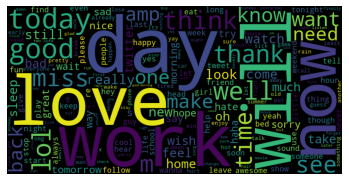

In [818]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling correction

In [819]:
%pip install -U textblob

In [820]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [821]:
from textblob import TextBlob

In [822]:
x = 'thankks forr waching it'

In [823]:
x = TextBlob(x).correct()

In [824]:
x

TextBlob("thanks for watching it")

### Tokenization using TextBlob

In [825]:
x = 'thanks#watching this video. please like it'

In [826]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [827]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


### Detecting Nouns

In [828]:
x = 'Breaking News: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [829]:
doc = nlp(x)

In [830]:
for noun in doc.noun_chunks:
    print(noun)

Donal Trump
the president
the USA
a deal
the moon


### Use TextBlob's Inbuilt Sentiment Classifier

In [831]:
from textblob.sentiments import NaiveBayesAnalyzer

In [832]:
x = 'we all stands together. we are gonna win this fight'

In [833]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [834]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)